### 1. Importing libraries and files

In [1]:
from textblob import TextBlob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re
from collections import Counter
import os
import string
# Download necessary nltk data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# Set Seaborn style
sns.set()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gerar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gerar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\gerar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\gerar\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


In [2]:
# Import txt file

with open('20th_century_scrape.txt', 'r', errors='ignore') as file: 
   data = file.read().replace( '\n', ' ')

### 2. Tokenization

In [3]:
# Sentence tokenization

from nltk.tokenize import sent_tokenize
tokenized_sent = sent_tokenize(data)
print(tokenized_sent) 

['    Key events of the 20th century - Wikipedia                            Jump to content        Main menu      Main menu move to sidebar hide    \t\tNavigation \t   Main pageContentsCurrent eventsRandom articleAbout WikipediaContact us      \t\tContribute \t   HelpLearn to editCommunity portalRecent changesUpload file                    Search            Search                Donate         Appearance                 Create account  Log in         Personal tools       Create account Log in      \t\tPages for logged out editors learn more    ContributionsTalk                             Contents move to sidebar hide     (Top)      1 Historic events in the 20th century     Toggle Historic events in the 20th century subsection      1.1 World at the beginning of the century       1.1.1 "The war to end all wars": World War I (1914â€“1918)         1.1.2 Russian Revolution and communism           1.2 Between the wars       1.2.1 Economic depression         1.2.2 The rise of dictatorship   

In [4]:
# Word tokenization

from nltk.tokenize import word_tokenize
tokenized_word = word_tokenize(data)
print(tokenized_word) 

['Key', 'events', 'of', 'the', '20th', 'century', '-', 'Wikipedia', 'Jump', 'to', 'content', 'Main', 'menu', 'Main', 'menu', 'move', 'to', 'sidebar', 'hide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'us', 'Contribute', 'HelpLearn', 'to', 'editCommunity', 'portalRecent', 'changesUpload', 'file', 'Search', 'Search', 'Donate', 'Appearance', 'Create', 'account', 'Log', 'in', 'Personal', 'tools', 'Create', 'account', 'Log', 'in', 'Pages', 'for', 'logged', 'out', 'editors', 'learn', 'more', 'ContributionsTalk', 'Contents', 'move', 'to', 'sidebar', 'hide', '(', 'Top', ')', '1', 'Historic', 'events', 'in', 'the', '20th', 'century', 'Toggle', 'Historic', 'events', 'in', 'the', '20th', 'century', 'subsection', '1.1', 'World', 'at', 'the', 'beginning', 'of', 'the', 'century', '1.1.1', '``', 'The', 'war', 'to', 'end', 'all', 'wars', "''", ':', 'World', 'War', 'I', '(', '1914â€', '“', '1918', ')', '1.1.2', 'Russian', 'Revolution', 'and', 'comm

In [5]:
from nltk.probability import FreqDist
dist_words = FreqDist(tokenized_word)
print(dist_words) 

<FreqDist with 4818 samples and 21836 outcomes>


In [6]:
dist_words.most_common(10)

[('.', 1571),
 ('the', 1099),
 (',', 963),
 ('of', 604),
 ('and', 398),
 ('The', 327),
 ('to', 326),
 ('[', 302),
 (']', 302),
 ('in', 292)]

### 3. Initial visualization

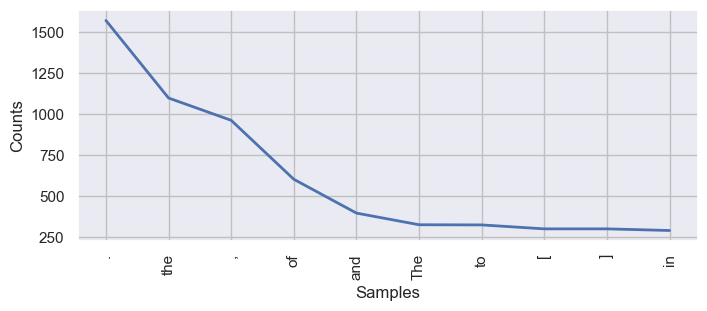

In [7]:
# Frequency Distribution Plot

plt.figure(figsize=(8, 3))
dist_words.plot(10, cumulative=False)
plt.show()


###### Since this visualization does not provide useful information I need to refine the data.

In [8]:
# Initialize stop words list for the english language
stop_words = set(stopwords.words('english'))
# Create a filtered list
filtered_words = [] 
for word in tokenized_word:
      if word not in stop_words:
           filtered_words.append(word)

In [9]:
# Create a new FreqDist for filtered–words

dist_words_filter = FreqDist(filtered_words)
print (dist_words_filter)

<FreqDist with 4715 samples and 17170 outcomes>


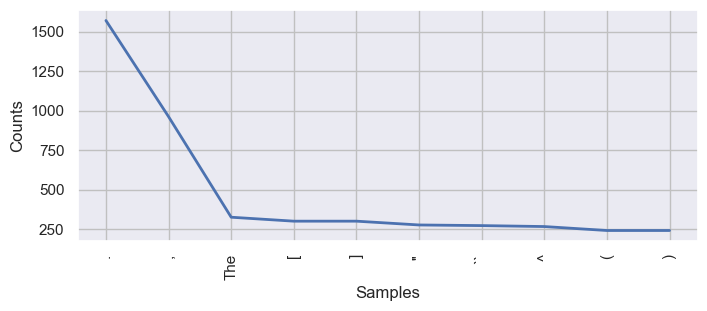

In [10]:
# Frequency Distribution Plot

plt.figure(figsize=(8, 3))
dist_words_filter.plot(10, cumulative=False)
plt.show()

In [11]:
# Substitute all punctuation marks with a space
sans_punc = re.sub(
    "[^a-zA-Z]",  # Search for all non-letters
    " ",          # Replace all non-letters with spaces
    " ".join(filtered_words)  # Apply the substitution to the string of filtered words
)


In [12]:
# Word tokenization

tokenized_word_2 = word_tokenize(sans_punc)
for word in tokenized_word_2:
    # Clean the word by stripping spaces, lowering the case, and removing punctuation
    word_clean = word.strip().lower().translate(str.maketrans('', '', string.punctuation))
print (tokenized_word_2)

['Key', 'events', 'th', 'century', 'Wikipedia', 'Jump', 'content', 'Main', 'menu', 'Main', 'menu', 'move', 'sidebar', 'hide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'us', 'Contribute', 'HelpLearn', 'editCommunity', 'portalRecent', 'changesUpload', 'file', 'Search', 'Search', 'Donate', 'Appearance', 'Create', 'account', 'Log', 'Personal', 'tools', 'Create', 'account', 'Log', 'Pages', 'logged', 'editors', 'learn', 'ContributionsTalk', 'Contents', 'move', 'sidebar', 'hide', 'Top', 'Historic', 'events', 'th', 'century', 'Toggle', 'Historic', 'events', 'th', 'century', 'subsection', 'World', 'beginning', 'century', 'The', 'war', 'end', 'wars', 'World', 'War', 'I', 'Russian', 'Revolution', 'communism', 'Between', 'wars', 'Economic', 'depression', 'The', 'rise', 'dictatorship', 'Global', 'war', 'World', 'War', 'II', 'The', 'war', 'Europe', 'Blitzkrieg', 'Operation', 'Barbarossa', 'Turning', 'tides', 'Operation', 'Overlord', 'Final', 'd

In [13]:
# Create a new FreqDist

dist_words_filter_2 = FreqDist(tokenized_word_2) 
print(dist_words_filter_2)

<FreqDist with 4071 samples and 11102 outcomes>


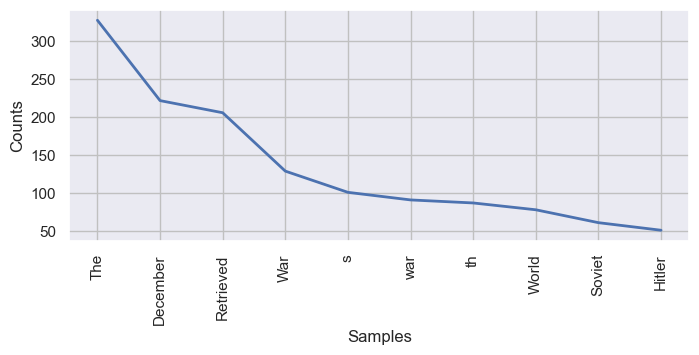

In [14]:
# Frequency Distribution Plot

plt.figure(figsize=(8, 3))
dist_words_filter_2.plot(10, cumulative=False)
plt.show()

In [15]:
new_stopwords = ["And", "Then", 'n', 't', 's', 'The']

filtered = []
for word in tokenized_word_2:
     if word not in new_stopwords:
        filtered.append(word)

### 4. POS Tagging

In [16]:
%%time
text = TextBlob(str(filtered))


CPU times: total: 0 ns
Wall time: 3.91 ms


In [17]:
tags_list = text.tags

In [18]:
tags_list

[('[', 'JJ'),
 ("'Key", 'NNP'),
 ("'", 'POS'),
 ("'events", 'NNS'),
 ("'", 'POS'),
 ("'th", 'NNP'),
 ("'", 'POS'),
 ("'century", 'NNP'),
 ("'", 'POS'),
 ("'Wikipedia", 'NNP'),
 ("'", 'POS'),
 ("'Jump", 'NNP'),
 ("'", 'POS'),
 ("'content", 'NNP'),
 ("'", 'POS'),
 ("'menu", 'NNP'),
 ("'", 'POS'),
 ("'menu", 'NNP'),
 ("'", 'POS'),
 ("'move", 'NNP'),
 ("'", 'POS'),
 ("'sidebar", 'NNP'),
 ("'", 'POS'),
 ("'hide", 'NNP'),
 ("'", 'POS'),
 ("'Navigation", 'NN'),
 ("'pageContentsCurrent", 'NNP'),
 ("'", 'POS'),
 ("'eventsRandom", 'NNP'),
 ("'", 'POS'),
 ("'articleAbout", 'IN'),
 ("'WikipediaContact", 'NNP'),
 ("'", 'POS'),
 ("'us", 'NNP'),
 ("'", 'POS'),
 ("'HelpLearn", 'NNP'),
 ("'", 'POS'),
 ("'editCommunity", 'NNP'),
 ("'", 'POS'),
 ("'portalRecent", 'NNP'),
 ("'", 'POS'),
 ("'file", 'IN'),
 ("'Search", 'NNP'),
 ("'", 'POS'),
 ("'Search", 'NNP'),
 ("'", 'POS'),
 ("'Donate", 'NNP'),
 ("'", 'POS'),
 ("'Appearance", 'NN'),
 ("'Create", 'NNP'),
 ("'", 'POS'),
 ("'account", 'NNP'),
 ("'", 'POS'),

In [19]:
df_text = pd.DataFrame(tags_list)
df_text.columns = [ 'Words', "Word type"]
df_text

,Words,Word type
0,[,JJ
1,'Key,NNP
2,',POS
3,'events,NNS
4,',POS
...,...,...
16257,',POS
16258,'Mobile,IN
16259,'view,NNP
16260,',POS


In [20]:
df_t=df_text.groupby('Word type').count().reset_index()
top10=df_t.nlargest(10, 'Words')

df_t

,Word type,Words
0,CC,1
1,CD,75
2,DT,13
3,EX,12
4,FW,43
5,IN,156
6,JJ,285
7,JJR,12
8,JJS,60
9,MD,59


In [21]:
top10

,Word type,Words
13,POS,6977
11,NNP,5674
12,NNS,1049
16,VBD,849
10,NN,386
17,VBG,321
6,JJ,285
5,IN,156
15,RB,140
20,VBZ,79


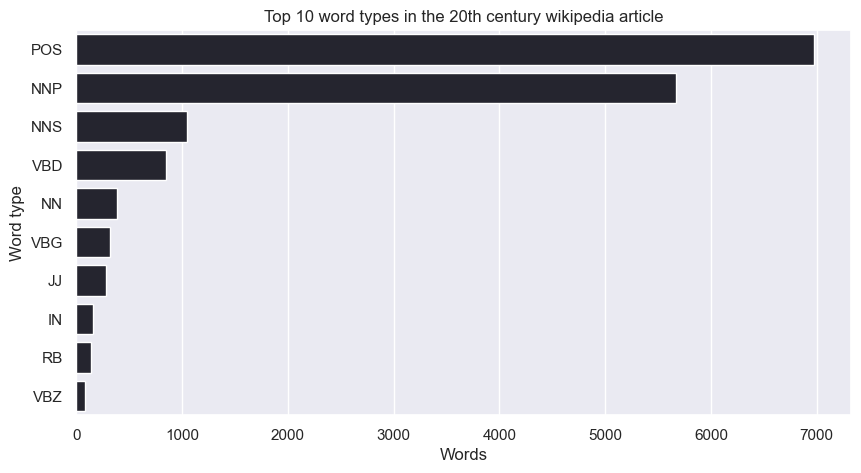

In [22]:
plt.figure(figsize = (10, 5))
with sns.dark_palette("xkcd:blue", 20):
      sns.barplot(x = "Words", y = "Word type",
     saturation = 0.9, data = top10).set_title("Top 10 word types in the 20th century wikipedia article")

### 5. Noun frequency

In [23]:
df_nouns = df_text[(df_text['Word type'] == "NN") | (df_text['Word type'] == "NNS") | (df_text['Word type'] == "NNS")]
df_nouns.columns = ["Word", "Occurrences"]
x = df_nouns.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurrences'], ascending=False)
top10 = y.nlargest(10, 'Occurrences') 

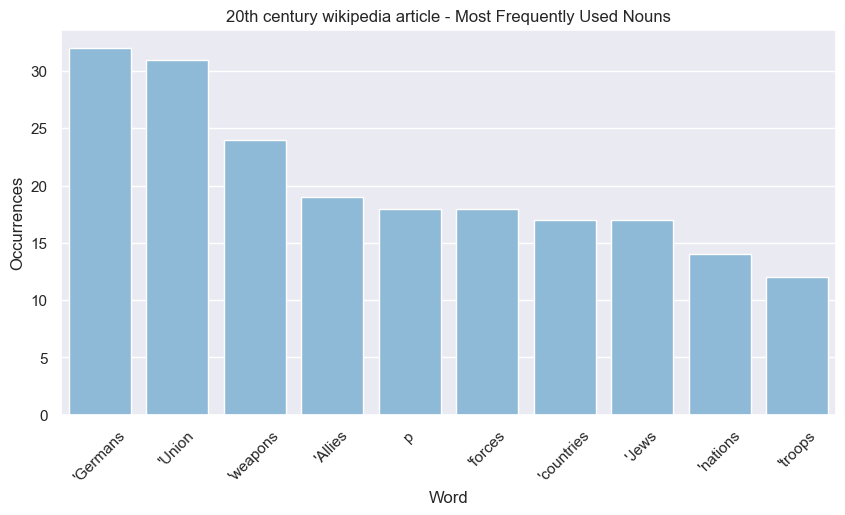

In [24]:
# Set the color palette
sns.set_palette("Blues_d")

# Create a barplot for the most frequently used nouns
plt.figure(figsize=(10, 5))
sns.barplot(x="Word", y="Occurrences", data=top10, saturation=0.9)

# Set the title
plt.title("20th century wikipedia article - Most Frequently Used Nouns")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

### 6. Verb Frequency

In [25]:
df_verbs = df_text[(df_text['Word type'] == "VB") | (df_text['Word type'] == "VBD") | (df_text['Word type'] == "VBG") | (df_text['Word type'] == "VBN")|(df_text['Word type'] == "VBP")|(df_text['Word type'] == "VBZ")]
df_verbs.columns = ["Word", "Occurrences"]
x = df_verbs.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurrences'], ascending=False)
top10 = y.nlargest(10, 'Occurrences') 

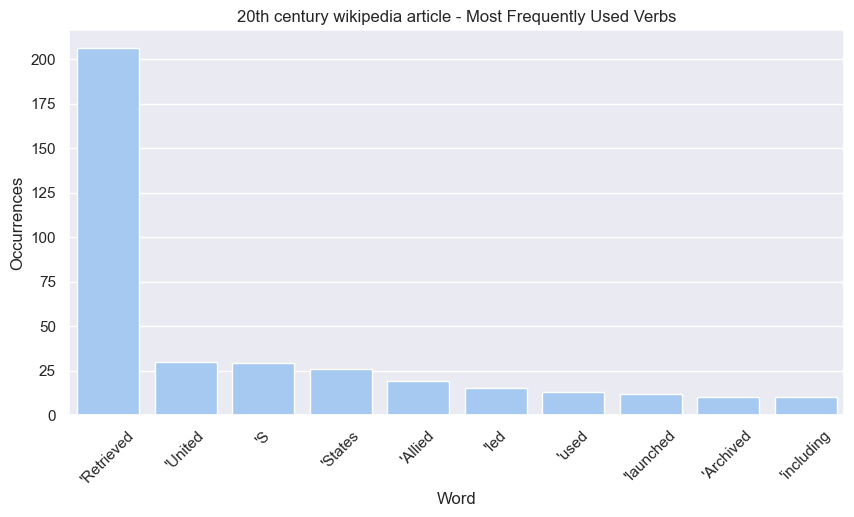

In [26]:
# Set the color palette
sns.set_palette("pastel")

# Create a barplot for the most frequently used nouns
plt.figure(figsize=(10, 5))
sns.barplot(x="Word", y="Occurrences", data=top10, saturation=0.9)

# Set the title
plt.title("20th century wikipedia article - Most Frequently Used Verbs")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

Retrieved is by far the ost common verb. This could be linked to the retrieval of troops and weapons that happened so often during the 20th century. Almost every decade there was an armed conflict. 

### 7. Adjective Frequency

In [27]:
df_adjectives = df_text[(df_text['Word type'] == "JJ") | (df_text['Word type'] == "JJR") | (df_text['Word type'] == "JJS")]
df_adjectives.columns = ["Word", "Occurrences"]
x = df_adjectives.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurrences'], ascending=False)
top10 = y.nlargest(10, 'Occurrences') 

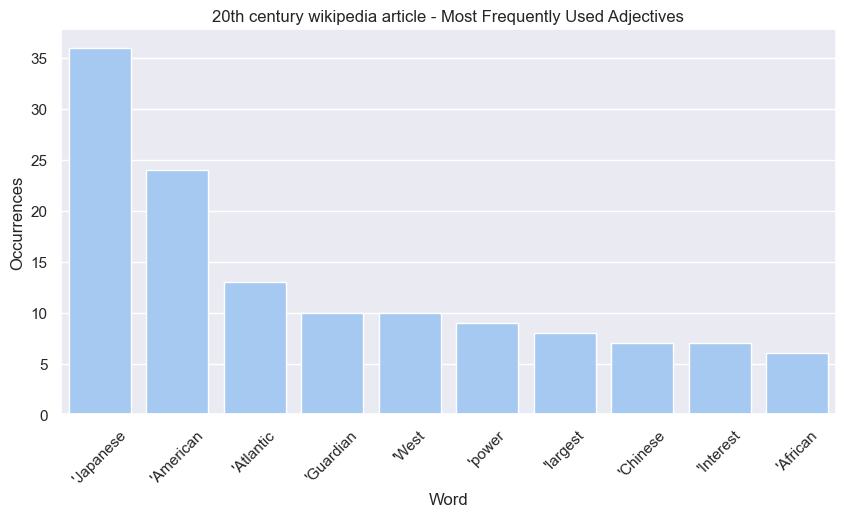

In [28]:
# Set the color palette
sns.set_palette("pastel")

# Create a barplot for the most frequently used nouns
plt.figure(figsize=(10, 5))
sns.barplot(x="Word", y="Occurrences", data=top10, saturation=0.9)

# Set the title
plt.title("20th century wikipedia article - Most Frequently Used Adjectives")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

"Japanese" and "American" are the most common adjectives. This seems mostly logical to me since the US played a pivotal role in the 20th century history. Japan was also very important but I'm unsure why it would be the most frequent word in this article. It is strange to me that the adjective "Soviet" does not appear in the top 10. 

### 8. Country frequency

In [29]:
# Importing a country list from a csv
data_path = r"D:\Documents\Jupyter Lab Projects\20th-century"
df_countries = pd.read_csv(os.path.join(data_path, "countries_list_20th_century.csv"))
country_list = df_countries['country_name'].tolist()

In [30]:
country_list = [country.strip() for country in country_list]
country_list

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas, The',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Central African Republic',
 'Chad',
 'Chile',
 "China, People's Republic of",
 'Colombia',
 'Comoros',
 'Congo, Democratic Republic of the',
 'Congo, Republic of the',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'East Timor',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia, The',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'G

In [31]:
# Create a filtered list
filtered_words_only_countries = [] 
for word in tokenized_word_2:
      if word in country_list:
           filtered_words_only_countries.append(word)

In [32]:
filtered_words_only_countries

['Panama',
 'France',
 'Russia',
 'Germany',
 'Austria',
 'Hungary',
 'Bulgaria',
 'Russia',
 'Germany',
 'Russia',
 'Russia',
 'Germany',
 'Ukraine',
 'Germany',
 'Austria',
 'Hungary',
 'Germany',
 'Germany',
 'Italy',
 'Germany',
 'Germany',
 'Germany',
 'Germany',
 'Austria',
 'Austria',
 'Germany',
 'Spain',
 'France',
 'Poland',
 'Poland',
 'France',
 'Germany',
 'Poland',
 'Poland',
 'Germany',
 'Poland',
 'Germany',
 'Estonia',
 'Latvia',
 'Lithuania',
 'Poland',
 'Finland',
 'Germany',
 'Poland',
 'Belgium',
 'Netherlands',
 'Luxembourg',
 'Belgium',
 'Denmark',
 'Norway',
 'Norway',
 'Norway',
 'Denmark',
 'Sweden',
 'Germany',
 'France',
 'France',
 'France',
 'France',
 'France',
 'Italy',
 'Greece',
 'Germany',
 'Greece',
 'Albania',
 'Greece',
 'Ukraine',
 'Belarus',
 'Libya',
 'Egypt',
 'Libya',
 'Egypt',
 'Iraq',
 'Iran',
 'Japan',
 'Germany',
 'Japan',
 'Russia',
 'Germany',
 'Italy',
 'Germany',
 'Morocco',
 'Algeria',
 'Italy',
 'Italy',
 'Italy',
 'Italy',
 'France'

In [33]:
df_words = pd.DataFrame(filtered_words_only_countries, columns=['Country'])

# Count the occurrences of each country
word_counts = df_words['Country'].value_counts()

# Convert the Series to a DataFrame
df_word_counts = word_counts.reset_index()

# Assign custom column names
df_word_counts.columns = ['Country', 'Frequency']

# Get the top 10 most frequent countries
df_frequent_countries = df_word_counts.nlargest(10, 'Frequency')

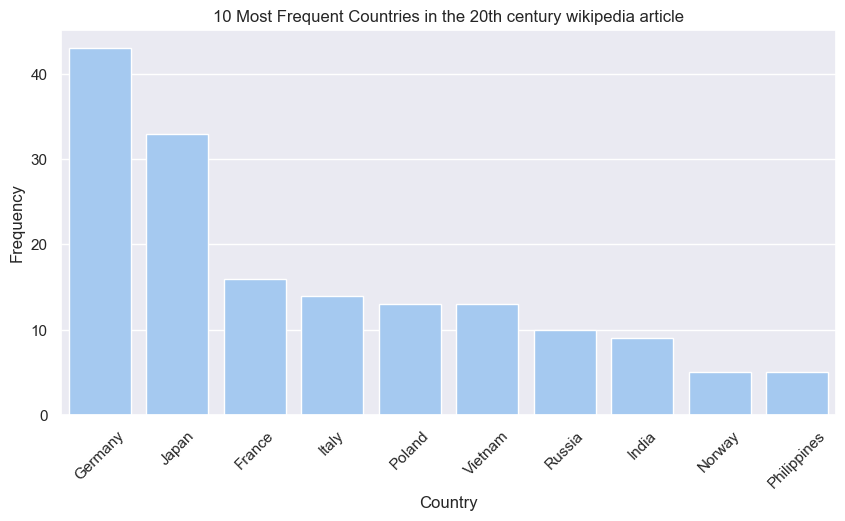

In [34]:
# Set the color palette
sns.set_palette("pastel")

# Create a barplot for the top 10 most frequent countries
plt.figure(figsize=(10, 5))
sns.barplot(x="Country", y="Frequency", data=df_frequent_countries, saturation=0.9)

# Set the title
plt.title("10 Most Frequent Countries in the 20th century wikipedia article")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


Germany and Japan are the countries mentioned most frequently in the 20th-century article. This is understandable for Germany, given its significant role during that time. However, Japan's prominence seems somewhat surprising to me. While it was Germany's ally in World War II, one might expect other countries to have played a more pivotal role than Japan. The United States for example is not in the top 10 which is very misleading. This could be because this country may appear as "The US", "USA", "America", "United States", "United States of America" or similar variations. This dilutes the frequency of the country and may contribute to it not being in the top 10. It is somewhat contradictory that the second most used adjective is american but the US is not in the top 10 most frequent nations. 